# Welcome to SYSC4415 Assignment 2

> Indented block


---
**TA: Elmira Amooei**

**Questions?: Rather than email, please ask any questions through the Discussion Board on Brightspace. That way, everyone can benefit from the answer**

** Deadline: See Brightspace end date**

---

### The goal is to develop an emotion detection CNN-based model that can detect emotions from images in real-time.

#### Instructions:
> **DO NOT** wait to the last minute to complete this assignment as it can take up to 10 hours to do this assignment if you are unfmiliar with Python and Machine Learning libraries. Your full notebook should not take more than 100 minutes to run on *T4 GPU*. (My full notebook takes under 35 minutes to run on T4 GPU on colab)

>  Step-by-step instructions are given in the notebook. Make sure to follow them all. Your solutions must be self-contained in this notebook; no other supplementary material or files will be accepted. As soon as I open your assignment's notebook , I will click "runtime" → "run all". Ensure your notebook works properly without any errors and your results are clearly displayed, as instructed.

> For text answers, like explanations, make sure to put your answers in the *Markdown* cells below that have this emoji (✅). Just double-click on the emoji and you can start typing. The questions that you must answer are placed in markdown cells with this emoji (❓) .

> Feel free to add code blocks if you wish. However, make sure to have sufficient comments in your code to describe what the code is doing. *( You don't need to add a comment to each line, just make sure it is clear what your functions are doing.)*

> The functions you need are already imported for you in the appropriate sections. You can reorganize the imports or import full packages (instead of specific functions) if you prefer to do so. *Make sure you are not removing the libraries by mistake as it will raise errors when I run your notebook and you will lose mark.*

> The required dataset is uploaded on Brightspace. Download it and store it in your Google Drive. It should be under your "My Drive" (After uploading it to your Google Drive, check the location by right clicking on the file *-> File Information -> Details -> Location*).  **Do not** put it into any sub-folder as  I won't be able to run your code on my data. It will raise an error and you will lose marks.

> I suggest doing your coding and first making sure everything works fine on a CPU. Then do the actual model training on a GPU. To chage your runtime from CPU to GPU and vice versa, select **Runtime** -> **Change Runtime Type** -> under **Hardware accelerator** clock on CPU or T4 GPU.

> Submit your Notebook as a *.ipynb* file that adopts this naming convention: ***SYSC4415W24_A2_FIRSTNAME_LASTNAME_StudentID.ipynb*** on *Brightspace*. No other submission (e.g., through email) will be accepted.


# 0) Context

Meet Dr. Emily Hayes(👩🏻‍⚕️), a leading psychologist who specializes in treating patients with various emotional disorders. Despite her expertise, Dr. Hayes often finds it challenging to accurately assess her patients' emotions during therapy sessions. Traditional methods, such as self-reporting and facial expressions, can be unreliable and subjective.

Determined to find a more effective solution, Dr. Hayes hears of James Green who works with a team of data scientists and engineers that can develop an emotion recognition model based on the Facial Expression Recognition 2013 (FER-2013) image dataset. This dataset contains thousands of facial images labeled with six basic emotions: happiness, sadness, anger, surprise, disgust, and fear (plus 'neutral').

Together, they embark on a journey to create a convolutional neural network (CNN) capable of accurately identifying and interpreting subtle facial cues. Their goal is to build a tool that can assist therapists like Dr. Hayes in better understanding their patients' emotions and providing more targeted interventions.

# 1) Initializations


Run this cell to mount Google Drive

*Note that it will open a new window to get authorizations to use your Google Drive. Just follow the steps.*

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Unzip the data into a folder called FER-2013.

> This will take a few moments.

> This will not take any space on your Google Drive. 🤗

In [2]:
# Unzip the data (be sure not to rename the data file you downloaded from Brightspace)
#---------------------------------------------------------------------------------------------------

!unrar x /content/drive/MyDrive/FER-2013.rar

Streaming output truncated to the last 5000 lines.
Extracting  FER-2013/sad/Training_80981346.jpg                            85%  OK 
Extracting  FER-2013/sad/Training_81008287.jpg                            85%  OK 
Extracting  FER-2013/sad/Training_81013514.jpg                            85%  OK 
Extracting  FER-2013/sad/Training_81039583.jpg                            85%  OK 
Extracting  FER-2013/sad/Training_81048535.jpg                            85%  OK 
Extracting  FER-2013/sad/Training_81053420.jpg                            85%  OK 
Extracting  FER-2013/sad/Training_81075199.jpg                            85%  OK 
Extracting  FER-2013/sad/Training_81097657.jpg                            85%  OK 
Extracting  FER-2013/sad/Training_81101893.jpg                            85%  OK 
Extracting  FER-2013/sad/Training_81104314.jpg                            85%  OK 
Extracting  FER-2013/sad/Trai

In [3]:
# Importing necessary libraries
#---------------------------------------------------------------------------------------------------

import pandas as pd
import os
from PIL import Image
import numpy as np

There are 7 categories to your dataset as you can see below:

In [4]:
data_path = "/content/FER-2013"
categories = ["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"]

data = []

1. Use "data_path" and "categories" above to  loop over the image paths and poplate a pandas dataframe with data and the corresponding emotion from each file. Print out the dimensions of your entire dataframe using `print()`.

In [5]:
# DataFrame where each row contains an image (as a numpy array) and its corresponding emotion label.
#---------------------------------------------------------------------------------------------------

# Loop over each category
for category in categories:
    # path to the category's folder
    category_path = os.path.join(data_path, category)
    # now for every category path, loop over each image
    for img_name in os.listdir(category_path):
        # path to the image
        img_path = os.path.join(category_path, img_name)

        # Load the image.
        img = Image.open(img_path)
        # Resize to the common size for FER-2013 images
        img = img.resize((48, 48))
        # Convert the image to grayscale to match FER-2013 format
        img = img.convert('L')
        # Convert the image to to numpy array
        img_array = np.array(img)

        # Append the image data and label to the data list
        data.append([img_array, category])

# Convert the list to a pandas DataFrame
df = pd.DataFrame(data, columns=['image', 'emotion'])

# Print out the dimensions of the DataFrame
print(df.shape)

(35887, 2)


2. Use the `head` method to print out the first 7 rows.



In [6]:
# Print the first 7 rows of the DataFrame
#---------------------------------------------------------------------------------------------------

print(df.head(7))

                                               image emotion
0  [[128, 194, 174, 78, 74, 70, 83, 80, 85, 103, ...   angry
1  [[28, 40, 36, 39, 47, 31, 43, 33, 33, 43, 55, ...   angry
2  [[79, 83, 82, 84, 83, 84, 84, 84, 74, 64, 80, ...   angry
3  [[45, 53, 67, 64, 30, 29, 40, 51, 33, 35, 34, ...   angry
4  [[126, 134, 140, 136, 45, 24, 115, 136, 137, 1...   angry
5  [[89, 94, 104, 120, 120, 168, 220, 223, 221, 2...   angry
6  [[166, 164, 164, 168, 170, 171, 173, 177, 178,...   angry


In [7]:
# Import the necessary library
#---------------------------------------------------------------------------------------------------

import matplotlib.pyplot as plt

3. Use the library above to look at one image from each of the categories.

*Please, do NOT apply any transformation to the images.*

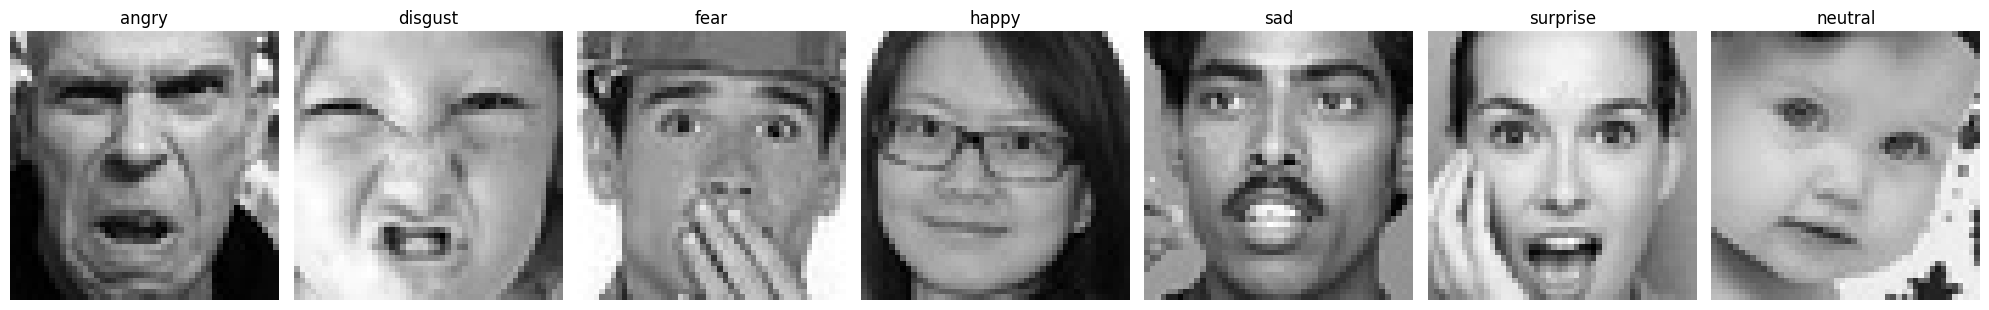

In [59]:
# Extracting and show one image of each category
#---------------------------------------------------------------------------------------------------

# Find one example for each category
examples = df.drop_duplicates(subset=['emotion'])

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(1, 7, figsize=(20, 3))

# Plot an example for every category as we loop
for ax, (index, row) in zip(axes, examples.iterrows()):
    # extract the image array and plot it
    img_array = row['image']
    # convert to grayscale
    ax.imshow(img_array, cmap='gray')
    ax.set_title(row['emotion'])
    ax.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

# 2) Preprocessing

Let's start off by doing some preproccessing:

1. Make sure your images are all 48*48. Use assert() and resize() if needed.
2. Covert your images to grayscale.
3. Using **Pytorch**, create a dataloader and split your dataset into 80% train and 20% test.
4. Create two bar charts showing the distribution of each of the 7 class labels in both your training and testing subsets.

 *Note that the methods you need are already imported.*

❓

1. Do we need to use one-hot encoding? Why or why not?
2. How will the grayscale transformation help our training?

✅  

1. yes, one-hot encoding is necessary since pytorch need the labels to be a tensor not a tuple.
one-hot encoding stands for converting categorical data to a type of data that is supported by machine learning algorithms


2. Since the colors in the image are not going to help us in detecting emotions, grayscale transformation will noticible reduce the training time and the model complexity.
Grayscale transformation reduces the dimensionality of the data from 3 color channels(r, g, b) to 1 color channel only.

In [60]:
# Import the necessary library
#---------------------------------------------------------------------------------------------------

import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt

In [68]:
# Using Pytorch, create a dataloader and split your dataset into 80% train and 20% test.
#---------------------------------------------------------------------------------------------------

class FacialExpressionsDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform
        # Predefined mapping from labels to integers
        self.label_to_int = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'sad': 4, 'surprise': 5, 'neutral': 6}

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        image = self.dataframe.iloc[idx, 0]  # Assuming image data is in the first column
        label = self.dataframe.iloc[idx, 1]  # Assuming label is in the second column
        if self.transform:
            image = Image.fromarray(image)
            image = self.transform(image)
        # Convert label from string to integer based on the mapping
        label_int = self.label_to_int[label]
        # Then, convert this integer label to a tensor
        label_tensor = torch.tensor(label_int, dtype=torch.long)
        return image, label_tensor


# Instantiate the dataset
dataset = FacialExpressionsDataset(df, transform=transform)

# Split the dataset
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)



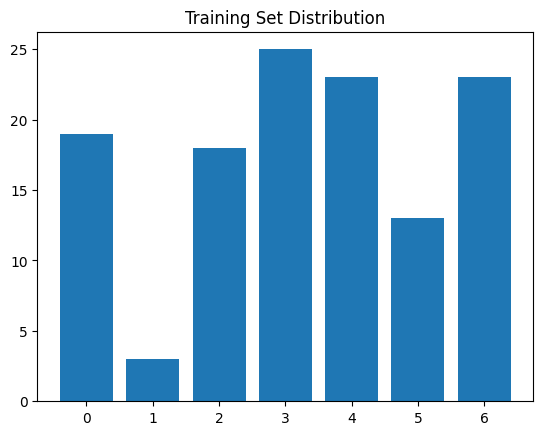

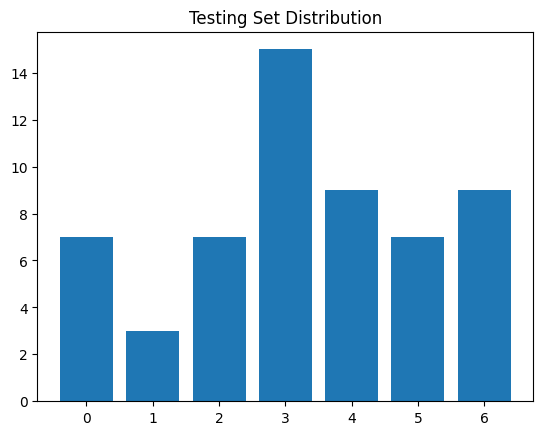

In [69]:
# Create two bar charts showing the distribution across the 7 class labels for your training and testing subsets.
#---------------------------------------------------------------------------------------------------

# Distribution Charts
def plot_distribution(dataset, title):
    labels = [label for _, label in dataset]
    distribution = pd.Series(labels).value_counts().sort_index()
    plt.bar(distribution.index, distribution.values)
    plt.title(title)
    plt.show()

plot_distribution(train_dataset, 'Training Set Distribution')
plot_distribution(test_dataset, 'Testing Set Distribution')

# 3) Baseline model

Create a baseline CNN model. You will improve on this model later on...

Your  CNN should:
1. Have two convolutional layers,
2. Use a Padding = 1,
3. Have a Kernel size = 3,
4. Have one max pooling layer.


*Note that the libararies you will need are already imported here.*

In [70]:
# Import the necessary library
#---------------------------------------------------------------------------------------------------

import torch
import torch.nn as nn
import torch.optim as optim
import torchsummary
from torchsummary import summary

In [71]:
# Import possible choices
#---------------------------------------------------------------------------------------------------

from sklearn.metrics import  accuracy_score
from sklearn.metrics import  precision_score
from sklearn.metrics import  recall_score
from sklearn.metrics import  f1_score
from sklearn.metrics import  classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import  roc_auc_score

In [73]:
# Create a baseline CNN model
#---------------------------------------------------------------------------------------------------

class BaselineCNN(nn.Module):
    def __init__(self, num_classes=7):
        super(BaselineCNN, self).__init__()
        # First conv layer
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        # Second conv layer
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        # Max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # Fully connected layer
        self.fc = nn.Linear(in_features=32 * 24 * 24, out_features=num_classes)
        # Activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        # Flatten the output for the fully connected layer
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Print out the CNN model
model = BaselineCNN()
print(model)
summary(model, (1, 48, 48))

BaselineCNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=18432, out_features=7, bias=True)
  (relu): ReLU()
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 48, 48]             160
              ReLU-2           [-1, 16, 48, 48]               0
         MaxPool2d-3           [-1, 16, 24, 24]               0
            Conv2d-4           [-1, 32, 24, 24]           4,640
              ReLU-5           [-1, 32, 24, 24]               0
            Linear-6                    [-1, 7]         129,031
Total params: 133,831
Trainable params: 133,831
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.

❓

List 3 ideas for how you will improve your baseline model (e.g., change the padding, kernel, etc.) For each idea, explain why you believe the idea may improve your model.

*Below, you apply your ideas to the CNN you will build in later steps and report how they made your results better/worse.*

✅

**1. Increase the number of convolutional layers(depth) and add dropout layers.**
- Adding more depth will allow the network to extract more complex and abstract features from the images.
- Dropout layers help prevent overfitting by randomly setting a fraction of input units to 0 at each update during training time.

**2. Add batch normalization after each convolutional layer and before the activation function.**

 - Batch normalization standardizes the inputs to a layer for each mini-batch. This can reduces the epochs required to train deep networks.

**3. Switch ReLU for LeakyReLU in layers.**

- LeakyReLU allows small updates even for inactive neurons, preventing them from "dying" and improving the model's ability to learn diverse features.

# 4) Lets train our baseline model!

1. Train your baseline CNN below for 10 epochs.
2. Print the loss for each epoch.
3. Evaluate your model on the test data.


❓

Choose one performance metric to report your results. Explain why you chose this metric. (e.g. accuarcy, recall, etc.)

✅
Accuracy, since it is easy to communicate to Dr. Hayes, who may not have a deep technical background.

In [74]:
# Initialize your model

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

# Assuming the BaselineCNN class definition is as previously provided
model = BaselineCNN(num_classes=7)

# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

 # Loop over the dataset multiple times
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # Get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}')

Epoch 1, Loss: 1.6807293342322709
Epoch 2, Loss: 1.535856778478304
Epoch 3, Loss: 1.4780149098759505
Epoch 4, Loss: 1.4310674385928894
Epoch 5, Loss: 1.3868337678484504
Epoch 6, Loss: 1.341414745639852
Epoch 7, Loss: 1.2900755288606232
Epoch 8, Loss: 1.2280261336031364
Epoch 9, Loss: 1.1624670108336383
Epoch 10, Loss: 1.102772051480937


In [75]:
#Test using your choosen metric
#---------------------------------------------------------------------------------------------------

model.eval()  # Set model to evaluation mode
correct = 0
total = 0



with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.shape[0]
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Accuracy on test data: {accuracy*100:.2f}%")


Accuracy on test data: 46.99%


In [77]:
# Initialize your model, loss function, and optimizer
#---------------------------------------------------------------------------------------------------
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

# Assuming the BaselineCNN class definition is as previously provided
model = BaselineCNN(num_classes=7)

# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

❓

Plot the confusion matrix for your results. Explain to Dr. Hayes what this confusion matrix is showing and how she can interpret it. Also, explain how your chosen performance metric relates to the confusion table *(in plain language, not an equation)*.

* *Note that the libraries you need are imported below.*

✅The confusion matrix provides a detailed breakdown of the model's predictions across the different classes. Each row represents the true labels, while each column represents the model's predictions. The diagonal values represent correct predictions, while off-diagonal values indicate misclassifications. This matrix can help Dr. Hayes understand which emotions are correctly recognized by the model and which are commonly confused with others.

The chosen metric, accuracy, relates to the confusion matrix as it is essentially the sum of the diagonal values (correct predictions) divided by the total number of instances. While accuracy gives a quick overview of model performance, the confusion matrix offers deeper insights into specific areas of strength and weakness, which are crucial for fine-tuning and improving the model's ability to assist in emotional disorder treatments.

In [80]:
# Import the necessary libraries
#---------------------------------------------------------------------------------------------------

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

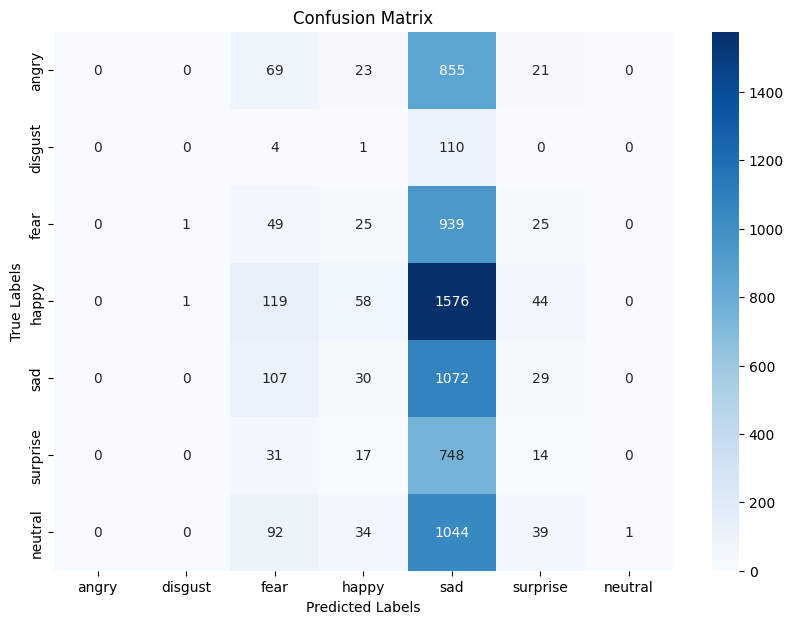

In [79]:
# Compute and plot the confusion matrix
#---------------------------------------------------------------------------------------------------

# Gather all test labels and predictions
all_labels = []
all_predictions = []



with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())

# Compute the confusion matrix
cm = confusion_matrix(all_labels, all_predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# 5) The real deal!

Lets improve your CNN to improve your baseline model!

Try to obtain a model that has the **best performance** (based on the metric you decided is best).

Make sure to include your 3 ideas on how to improve your baseline model (that you mentioned in a question box a few cells ago.)

* Make sure that your code shows how you explored different ideas.
* Each of the three attempts below should show the addition of one new idea in your model.
* Include performance evaluation using your selected performance metric and a confusion matrix.
* Be sure to add comments in the code blocks to show how you modified the model architecture.

## 5a) Your first (🥇) attempt at improving your model goes here. 👇🏻

In [81]:
# 1. Increase the number of convolutional layers(depth) and add dropout layers.
# Define your improved CNN model, call it ImprovedCNNOne()

#---------------------------------------------------------------------------------------------------

class ImprovedCNNOne(nn.Module):
    def __init__(self, num_classes=7):
        super(ImprovedCNNOne, self).__init__()
        # First convolutional layer
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        # Added a new convolutional layer to increase depth
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # Added dropout layer
        self.dropout = nn.Dropout(0.5)
        # Adjusted for additional conv layer
        self.fc1 = nn.Linear(128 * 6 * 6, 512)
        self.fc2 = nn.Linear(512, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.relu(self.conv3(x))
        x = self.pool(x)
        # Adjusted for additional conv layer
        x = x.view(-1, 128 * 6 * 6)
        # Apply dropout
        x = self.dropout(x)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [82]:
# Evaluation on the test set
#---------------------------------------------------------------------------------------------------

model = ImprovedCNNOne()
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images, labels
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of ImprovedCNNOne on test images: {accuracy:.2f}%')



Accuracy of ImprovedCNNOne on test images: 14.17%


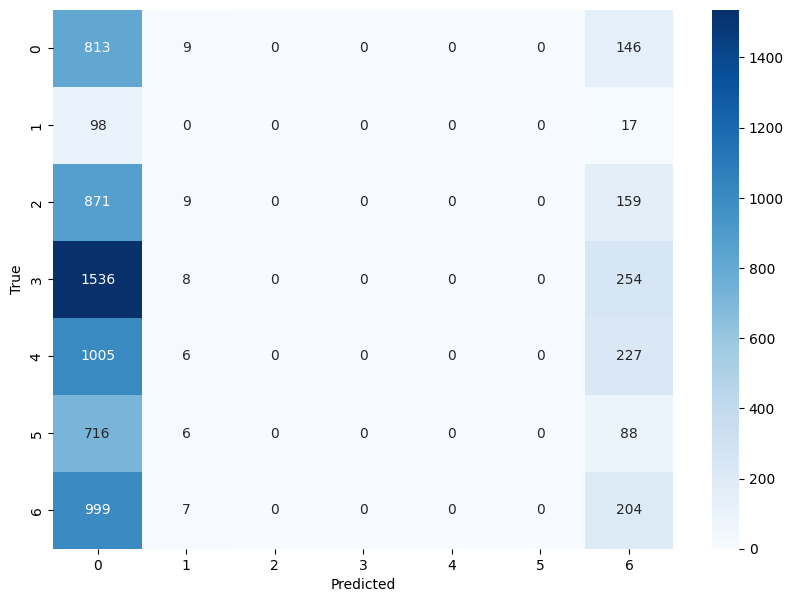

In [83]:
# Evaluate model and create the confusion matrix
#---------------------------------------------------------------------------------------------------

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Collect all the predictions and true labels
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images, labels
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## 5b) Your second (🥈) **attempt** at improving your model goes here. 👇🏻

In [84]:
# 2. Add batch normalization after each convolutional layer and before the activation function.
# Define your finetuned CNN model, call it ImprovedCNNTwo()
#---------------------------------------------------------------------------------------------------

class ImprovedCNNTwo(nn.Module):
    def __init__(self, num_classes=7):
        super(ImprovedCNNTwo, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        # Added batch normalization
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        # Added batch normalization
        self.bn2 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 12 * 12, 512)
        self.fc2 = nn.Linear(512, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.bn1(self.conv1(x))))
        x = self.pool(self.relu(self.bn2(self.conv2(x))))
        x = x.view(-1, 64 * 12 * 12)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [85]:
# Evaluation on the test set
#---------------------------------------------------------------------------------------------------

model = ImprovedCNNTwo()

model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images, labels
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of ImprovedCNNTwo on test images: {accuracy:.2f}%')


Accuracy of ImprovedCNNTwo on test images: 14.91%


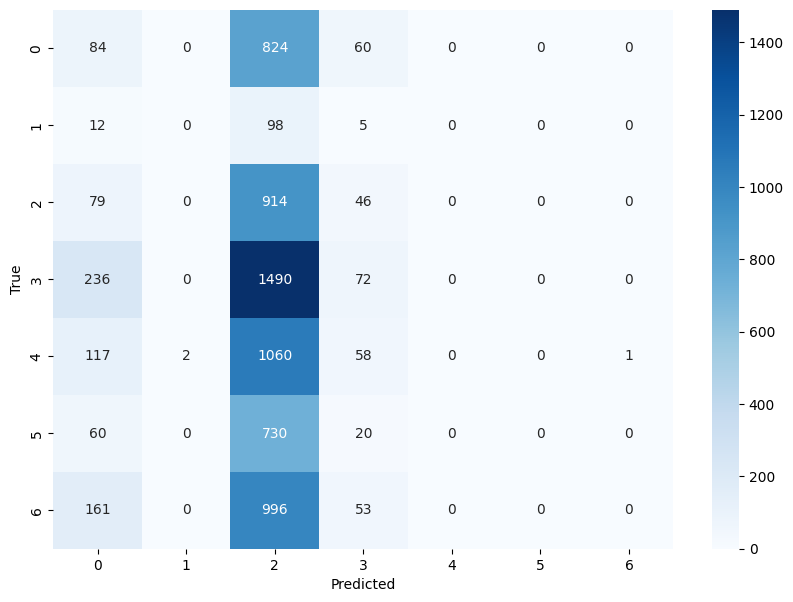

In [86]:
# Evaluate model and create the confusion matrix
#---------------------------------------------------------------------------------------------------

all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images, labels
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## 5c) Your third (🥉) attempt at improving your model goes here. 👇🏻

In [88]:
# 3. Switch ReLU for LeakyReLU in layers.
# Define your finetuned CNN model, call it ImprovedCNNThree()
#---------------------------------------------------------------------------------------------------

class ImprovedCNNThree(nn.Module):
    def __init__(self, num_classes=7):
        super(ImprovedCNNThree, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        # Use LeakyReLU as the activation function
        self.lrelu = nn.LeakyReLU(negative_slope=0.01)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 12 * 12, 512)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.pool(self.lrelu(self.conv1(x)))
        x = self.pool(self.lrelu(self.conv2(x)))
        x = x.view(-1, 64 * 12 * 12)
        x = self.lrelu(self.fc1(x))
        x = self.fc2(x)
        return x


In [89]:
# Evaluation on the test set
#---------------------------------------------------------------------------------------------------

model = ImprovedCNNThree()
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images, labels
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of ImprovedCNNThree on test images: {accuracy:.2f}%')


Accuracy of ImprovedCNNThree on test images: 11.30%


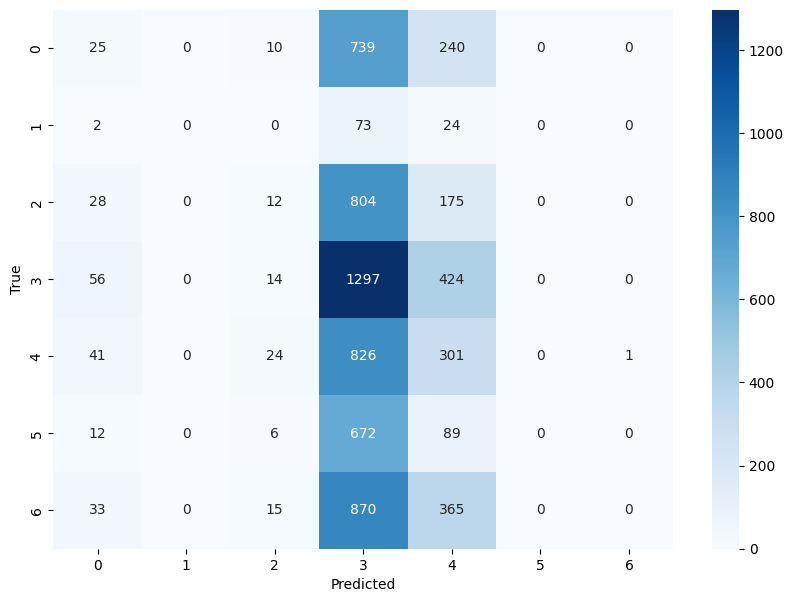

In [52]:
# Evaluate model and create the confusion matrix
#---------------------------------------------------------------------------------------------------

all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images, labels
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


❓

Decide which model you would like to present to Dr. Hayes as your final product. Using your performance metric, explain to her why you think this model is the best one. (Make sure to include your confusion matrix and your performance measure.)

# 6) Final thoughts

❓

Questions from Dr. Hayes:

1. Now that you have developed this model, briefly explain how you will continue to improve your model in future versions?

2. A competitor has recently trained an FFNN on the same dataset that performs worse than your model. Why do you think your CNN performs better?


✅

1.
I am planning to add more pictures and emotions to help the model learn better.

I am also planning to make the model to adjust better to each person's unique way of showing emotions.


2.

CNN is good at noticing where things are in an image, like the position of eyes or mouth

CNNs need fewer details to learn from images

CNNs figure out on their own what's important in an image to understand emotions, unlike FFNNs, which need a bit more guidance.



# 7) An opportunity! *(optional)*

An external investor is ready to run your model on small device that has a webcam. The device has limited compute resources because it needs to be kept cheap and accessible.

* **Optional step**
> Run the code bellow to see if your model can perform in realtime.

*Please DO NOT change the code below.*

In [53]:
# Neccessary libraries
import cv2
from IPython.display import display, Image, Javascript
from PIL import Image
from google.colab.output import eval_js
from base64 import b64decode

In [54]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

All done! 🤩